# Import Libraries

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Functions

In [152]:
def fourierTransform(img):
    # Compute the discrete Fourier Transform of the image
    fourier = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    
    # Shift the zero-frequency component to the center of the spectrum
    fourier_shift = np.fft.fftshift(fourier)
    
    # calculate the magnitude of the Fourier Transform
    magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))
    
    # Scale the magnitude for display
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

    return fourier_shift, magnitude

In [153]:
name = '1000k2'

# Inspect Input Image

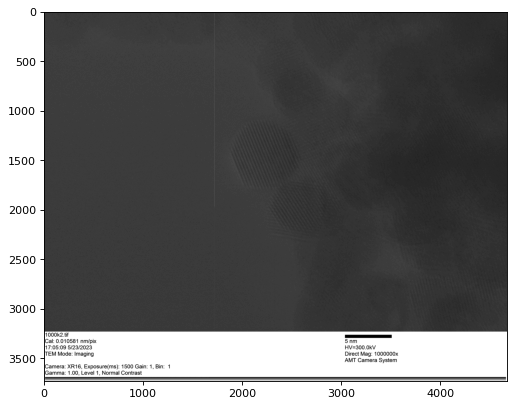

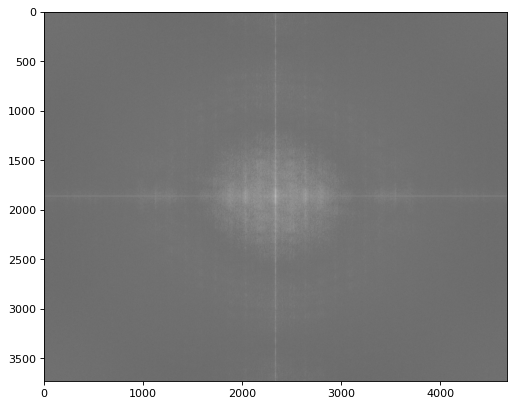

In [154]:
input_image = cv2.imread(name + '.tif', 0)

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(input_image, cmap='gray');

input_shift, input_fourier = fourierTransform(input_image)

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(cv2.cvtColor(input_fourier, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

# Image Processing

## Histogram Equalization

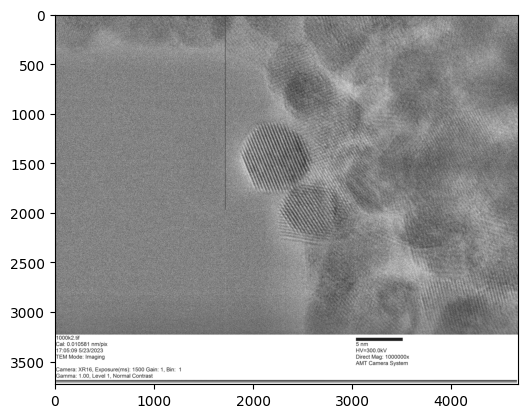

In [155]:
# brighten image
brightened_image = cv2.add(input_image, 50)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=20.0, tileGridSize=(10,10))
equalized_image = clahe.apply(brightened_image)

plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

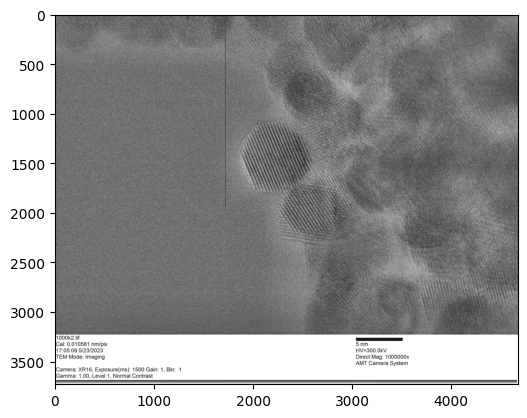

In [156]:
equalized_image = cv2.equalizeHist(equalized_image) 

plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

In [157]:
cv2.imwrite(name + '_result_equalized.tif', equalized_image)

True

## Fourier Masking

In [158]:
equalized_shift, equalized_fourier = fourierTransform(equalized_image)

# center of image
rows, cols = equalized_image.shape
crow, ccol = int(rows/2), int(cols/2)

# create mask - circular filter
mask = np.ones((rows, cols, 2), np.uint8)
r=500
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 >= r*r
mask[mask_area] = 0

# apply filter
fshift = equalized_shift * mask

# return to spatial domain
f_ishift = np.fft.ifftshift(fshift)
masked_image = cv2.idft(f_ishift)
masked_image = cv2.magnitude(masked_image[:,:,0], masked_image[:,:,1])
masked_image = cv2.normalize(masked_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# brighten image
masked_image = cv2.add(masked_image, 30)

C:\Users\songk\AppData\Local\Temp\ipykernel_19384\1075295249.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(20 * np.log(cv2.magnitude(fshift[:,:,0], fshift[:,:,1])))


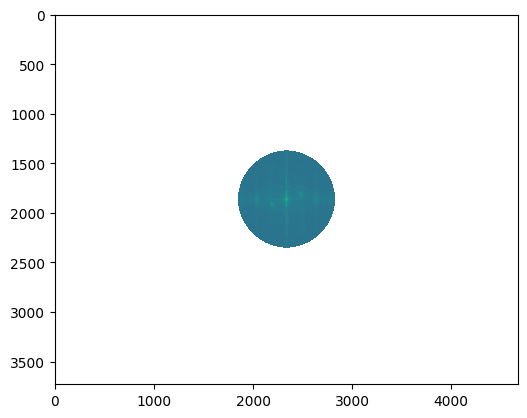

In [159]:
plt.imshow(20 * np.log(cv2.magnitude(fshift[:,:,0], fshift[:,:,1])))

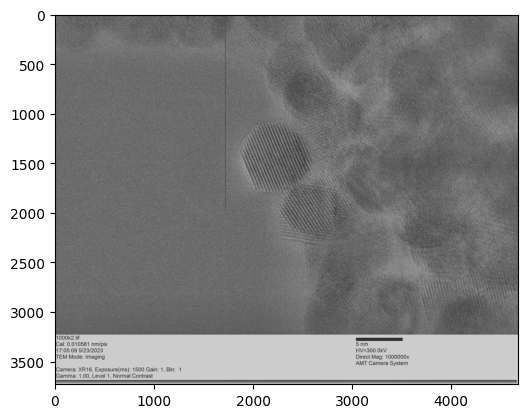

In [160]:
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))

In [161]:
cv2.imwrite(name + '_result_masked.tif', masked_image)

True

## Noise Removal

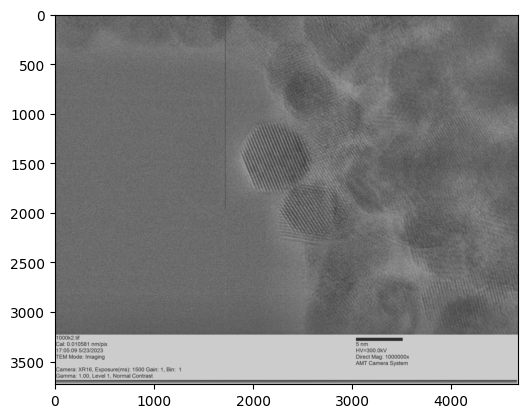

In [162]:
# Remove noise using a median filter
denoised_image = cv2.GaussianBlur(masked_image, (7, 7), 0)

plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

In [163]:
cv2.imwrite(name + '_result_denoised.tif', denoised_image)

True

## Sharpening

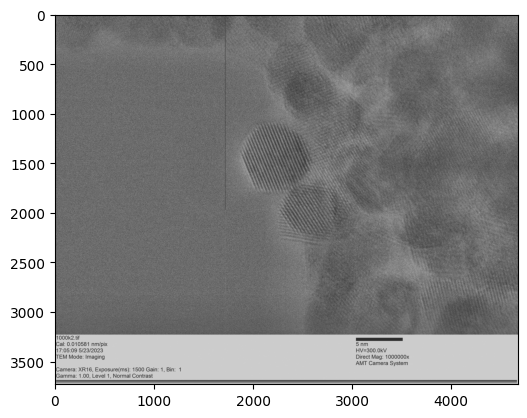

In [164]:
# Create the sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Sharpen the image
sharpened_image = cv2.filter2D(denoised_image, -1, kernel)

plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

In [165]:
cv2.imwrite(name + '_result_sharpened.tif', sharpened_image)

True

# Save Output Image

In [18]:
#output_image = sharpened_image
#cv2.imwrite(name + '_result.tif', output_image)

True

# Input-Output Comparison

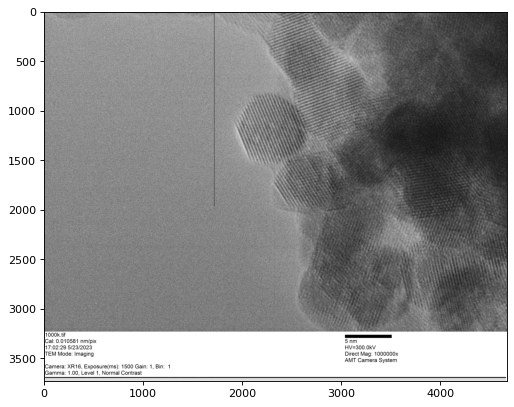

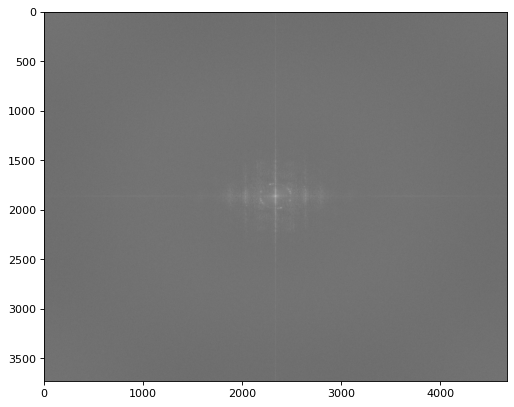

In [65]:
output_image = cv2.imread(name + '_result.tif')

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(result_image, cmap='gray');

output_fourier = fourierTransform(output_image)

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(cv2.cvtColor(output_fourier, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

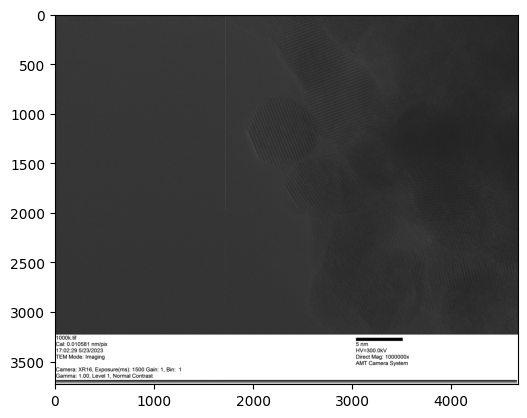

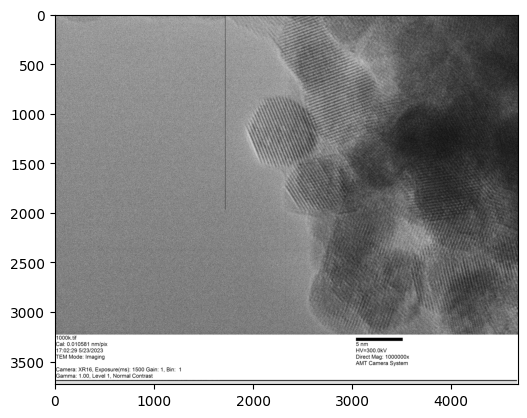

In [50]:
plt.figure()
plt.imshow(input_image, cmap='gray');

plt.figure()
plt.imshow(output_image, cmap='gray');

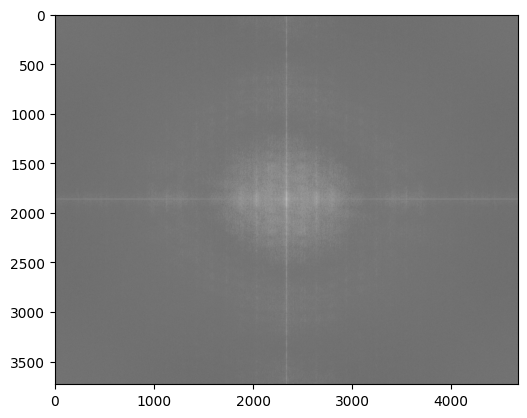

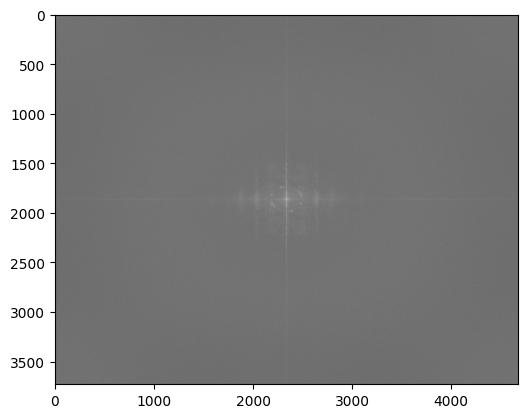

In [48]:
plt.figure()
plt.imshow(cv2.cvtColor(input_fourier, cv2.COLOR_BGR2RGB))

plt.figure()
plt.imshow(cv2.cvtColor(output_fourier, cv2.COLOR_BGR2RGB))